<a href="https://colab.research.google.com/github/Brunosoars/PUC_Data_Science/blob/main/Sprint_2/MVP_Machine_Learning_%26_Analytics_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning & Analytics

## Aluno: Bruno Soares Rodrigues da Silva

# Treinamento dos modelos clássicos de Machine Learning

## 1. Definição do Problema

O dataset objeto deste estudo foi extraído do repositório UCI, muito utilizado pela comunidade de machine learning para suportar estudos e análises e lista atributos de 303 pacientes. O objetivo é, através da interpretação dos dados listados, prever se o indivíduo sofre de alguma doença do coração. Para tal, são apresentados nos atributos variáveis como idade, gênero, pressão sanguínea, colesterol, dentre outros... e uma variável binária que classifica se o indivíduo sofre ou não de alguma doença cardíaca ( 0 - ausência e 1 - presença ). Para maiores informações sobre o dataset, consulte: https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland

**Informações sobre os atributos:**
1. **age** -  idade do paciente
2. **sex** - gênero (1 - masculino, 0 - feminino)
3. **cp** - dor na região do peito já vivenciado pelo paciente (categorizado em: 0 angina típica, 1 angina atípica, 2 dor não anginosa, 3 assintomática)
4. **trestbps** - nível de pressão sanguínea do paciente no modo de repouso em mm/HG
5. **chol** - Colesterol sérico em mg/dl
6. **fbs** - Os níveis de açúcar no sangue em jejum > 120 mg/dl representa como 1 em caso de verdadeiro e 0 como falso
7. **restecg** - Resultado do eletrocardiograma em repouso são representados em 3 valores distintos - 0 : Normal; 1: ter anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST de > 0,05 mV); 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
8. **thalach** - Frequência cardíaca máxima atingida
9. **exang** - Angina induzida pelo exercício - 0 representando Não; 1 representando Sim
10. **oldpeak** - Exercício induzido ST - depressão em relação ao estado de repouso
11. **slope** - segmento ST medido em termos de inclinação durante o exercício de pico
0: inclinação para cima; 1: plano; 2: inclinação para baixo
12. **ca** - maiores vasos sanguíneos (0-3)
13. **thal** - Uma doença do sangue chamada talassemia - 0: NULO 1: fluxo sanguíneo normal 2: defeito fixo (sem fluxo sanguíneo em alguma parte do coração) 3: defeito reversível (um fluxo sanguíneo é observado, mas não é normal
14. **target** - É a variável alvo que temos que prever - 1 significa que o paciente está sofrendo de doença cardíaca e 0 significa que o paciente é normal.

Como temos a variável alvo e o objetivo do dataset é prever a incidência ou não de doença cardíaca nos pacientes, entendemos que trata-se de um problema de aprendizado supervisionado do tipo classificação.

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2. Carga de Dados

Utilizaremos o pacote o pacote Pandas (Python Data Analysis Library) para acessar o dataset e realizar alguns exercícios de análise exploratória.

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Brunosoars/PUC_Data_Science/main/Sprint_2/data/Heart_disease_cleveland_new.csv"

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, delimiter=',')

A seguir, teremos um overview do dataset explorando as linhas iniciais e finais do dataset.

In [ ]:
display(dataset)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [ ]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


Nesta análise inicial pode-se identificar que o dataset possui 303 linhas e 14 colunas, não possui valores nulos e o tipo das variáveis é, em sua maioria, inteiro.

## 3. Análise de Dados

Nesta seção abordaremos alguns conceitos de estatística descritiva visando avaliar o grau de concentração dos dados, como média, moda, mediana e medidas separatrizes, e das medidas de dispersão, que permitem saber o grau de dispersão dos dados em torno de uma medida de posição (geralmente a média), como desvio padrão, variância e coeficiente de variação.

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


Uma análise inicial dos valores mínimo e máximo da idade dos pacientes indica um preenchimento consistente e sem outliers. Atestaremos isso mais à frente.

Vamos avaliar a distribuição dos dados pelo gênero

In [ ]:
# distribuição das classes I
print(dataset.groupby('sex').size())

sex
0     97
1    206
dtype: int64


In [ ]:
# média da idade por gênero
dataset[["sex", "age"]].groupby("sex").mean()

,age
sex,
0,55.721649
1,53.834951


In [ ]:
# média da idade por gênero
dataset[["sex", "age"]].groupby("sex").median()

,age
sex,
0,57.0
1,54.5


Verificou-se que 68% da amostragem é do sexo masculino e 32% do sexo feminino, o que indica um desbalanceamento que deverá ser tratado mais à frente.

O resultado da média e mediana da idade agrupada pelo gênero não indica uma dispersão de valores

In [ ]:
# distribuição das classes II
print(dataset.groupby('target').size())

target
0    164
1    139
dtype: int64


A análise do atributo *target* indica que as classes estão balanceadas.

In [ ]:
# Correlação de Pearson
dataset.corr(method = 'pearson')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.122300,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.367911,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.259835,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.126879,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.030438,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.054164,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.019115,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.257980,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.321680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.333925,0.424510


Executamos o comando acima para apresentação da correlação de cada par de variáveis. Identificou-se uma correlação média ( >0.5 ) entre a variável *thal* - indicativo da doença talassemia - e a variável *target* - Ausência ou presença de doença cardíaca.

### Visualizações Unimodais

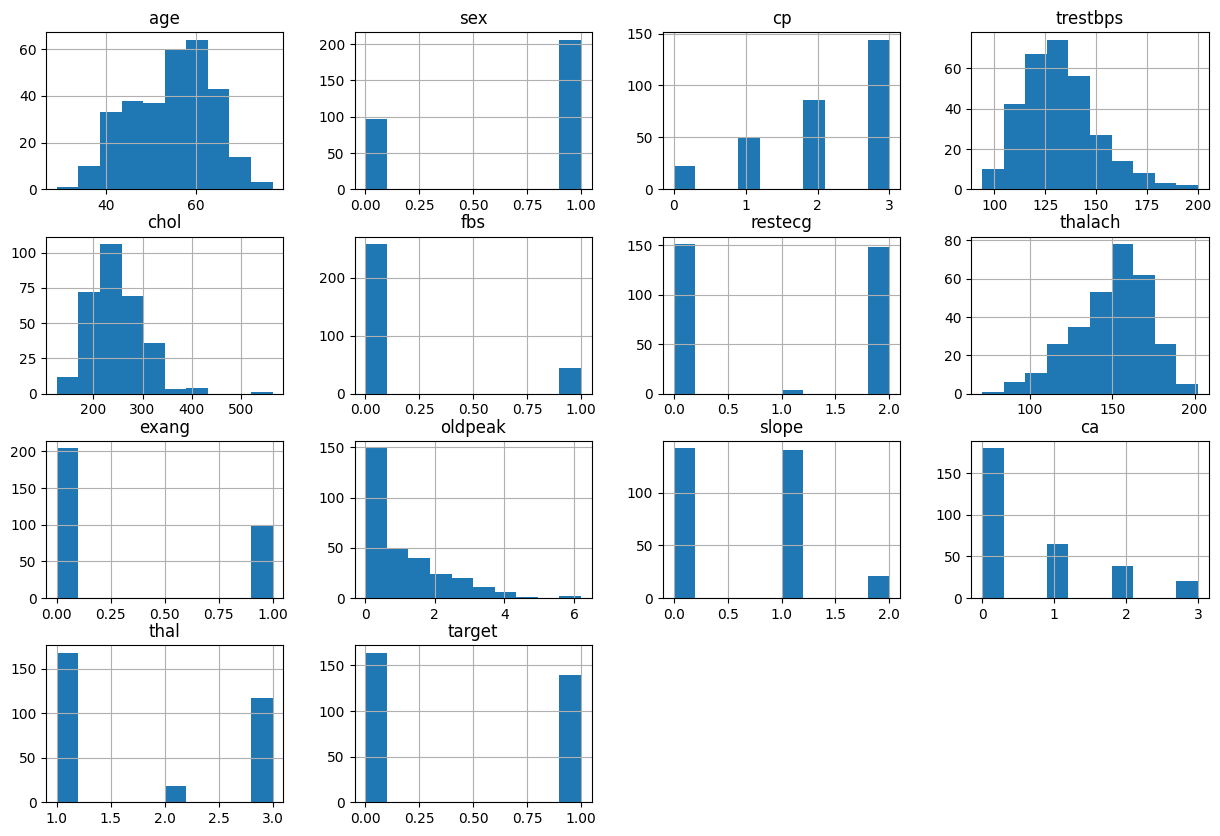

In [ ]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

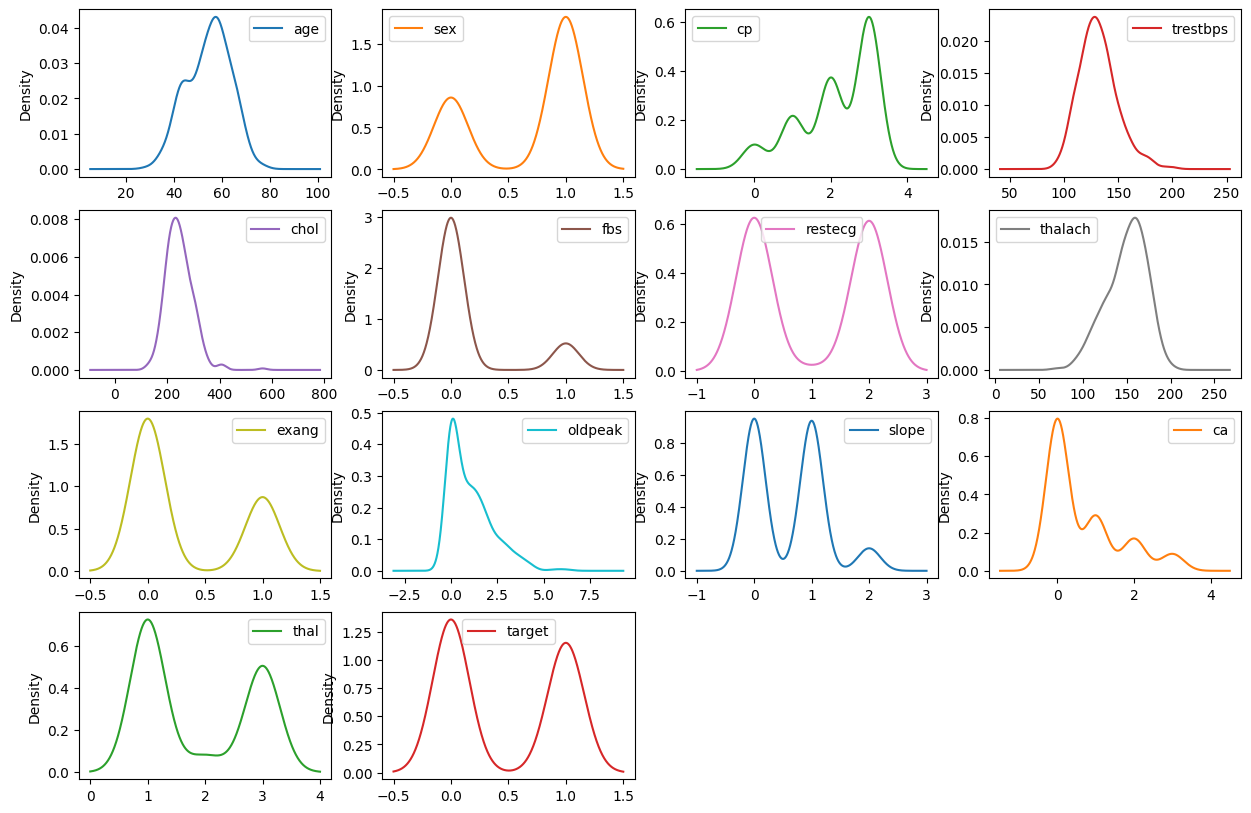

In [ ]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

Com o histograma e o gráfico de densidade conseguimos visualizar a distribuição dos atributos do dataset e fazer algumas observações. Destacamos alguns pontos a seguir:



*   Variável Idade: maior amostragem entre 50 - 60 anos;
*   Variável gênero: maior amostragem do sexo masculino (conforme já evidenciado anteriormente);
*   Variável que indica a dor na região do peito - maior incidência de assintomáticos, mas uma amostragem representativa de casos de dor não aginosa;
*   Pressão sanguínea: maior representatividade entre 120 e 140 mm/HG;
*   Colesterol: maior concentração entre 200 e 300 mg/dl;
*   Frequência cardíaca máxima atingida: entre aproximadamente 130 e 160.







age            Axes(0.125,0.11;0.133621x0.77)
trestbps    Axes(0.285345,0.11;0.133621x0.77)
chol         Axes(0.44569,0.11;0.133621x0.77)
thalach     Axes(0.606034,0.11;0.133621x0.77)
oldpeak     Axes(0.766379,0.11;0.133621x0.77)
dtype: object

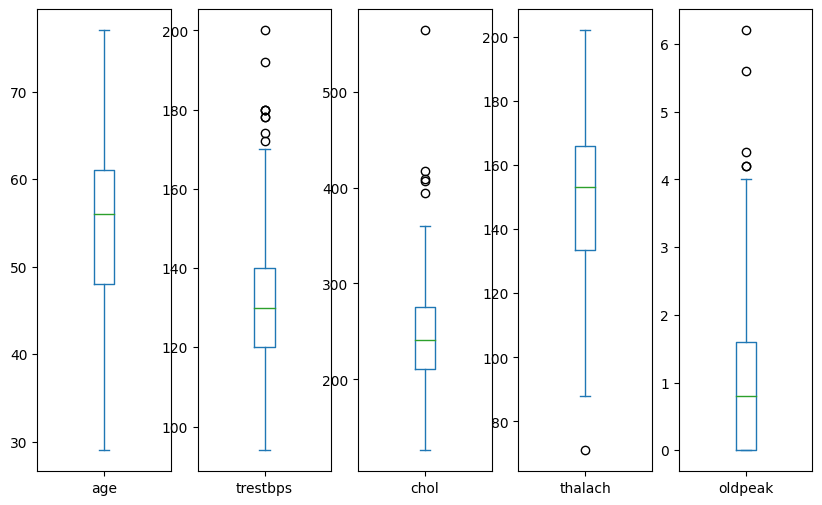

In [ ]:
# Boxplot
dataset[["age","trestbps", "chol", "thalach", "oldpeak"]].plot(kind='box',figsize=(10,6),subplots=True)

Destacamos algumas variáveis para olharmos mais detalhadamente no bloxplot e avaliarmos os resultados centrais e outliers. Alguns pontos chamaram a atenção:



*   Resultado de pressão arterial em modo repouso acima dos 160 mm/HG, considerando que o valor de referência costuma variar entre  120 mm/Hg - 140 mm/Hg;
*   Nível de colesterol acima dos 300 mg/dL, considerando os valores desejáveis até 199 mg/dL, limítrofes entre 200 e 239 mg/dL e altos acima de 240 mg/dL. Temos um resultado acima dos 500mg/dL, que influencia na média do mesmo, fazendo com que a mediana seja a medida de tendência central mais apropriada.



### Visualizações Multimodais

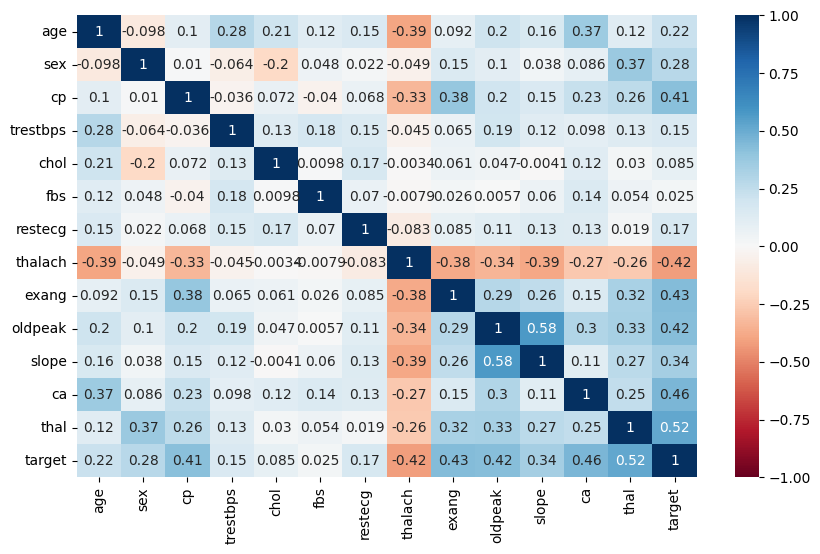

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

A análise da correlação usando o Seaborn indicou além da média correlação positiva entre as variáveis *thal* e *target*, outra média correlação positiva entre as variáveis *olpeak* e *slope*, que não foi percebido no exercício anterior. O recurso visual apresentado pelo Seaborn mostrou-se fundamental para suportar a análise e evitar que algo passasse despercebido.

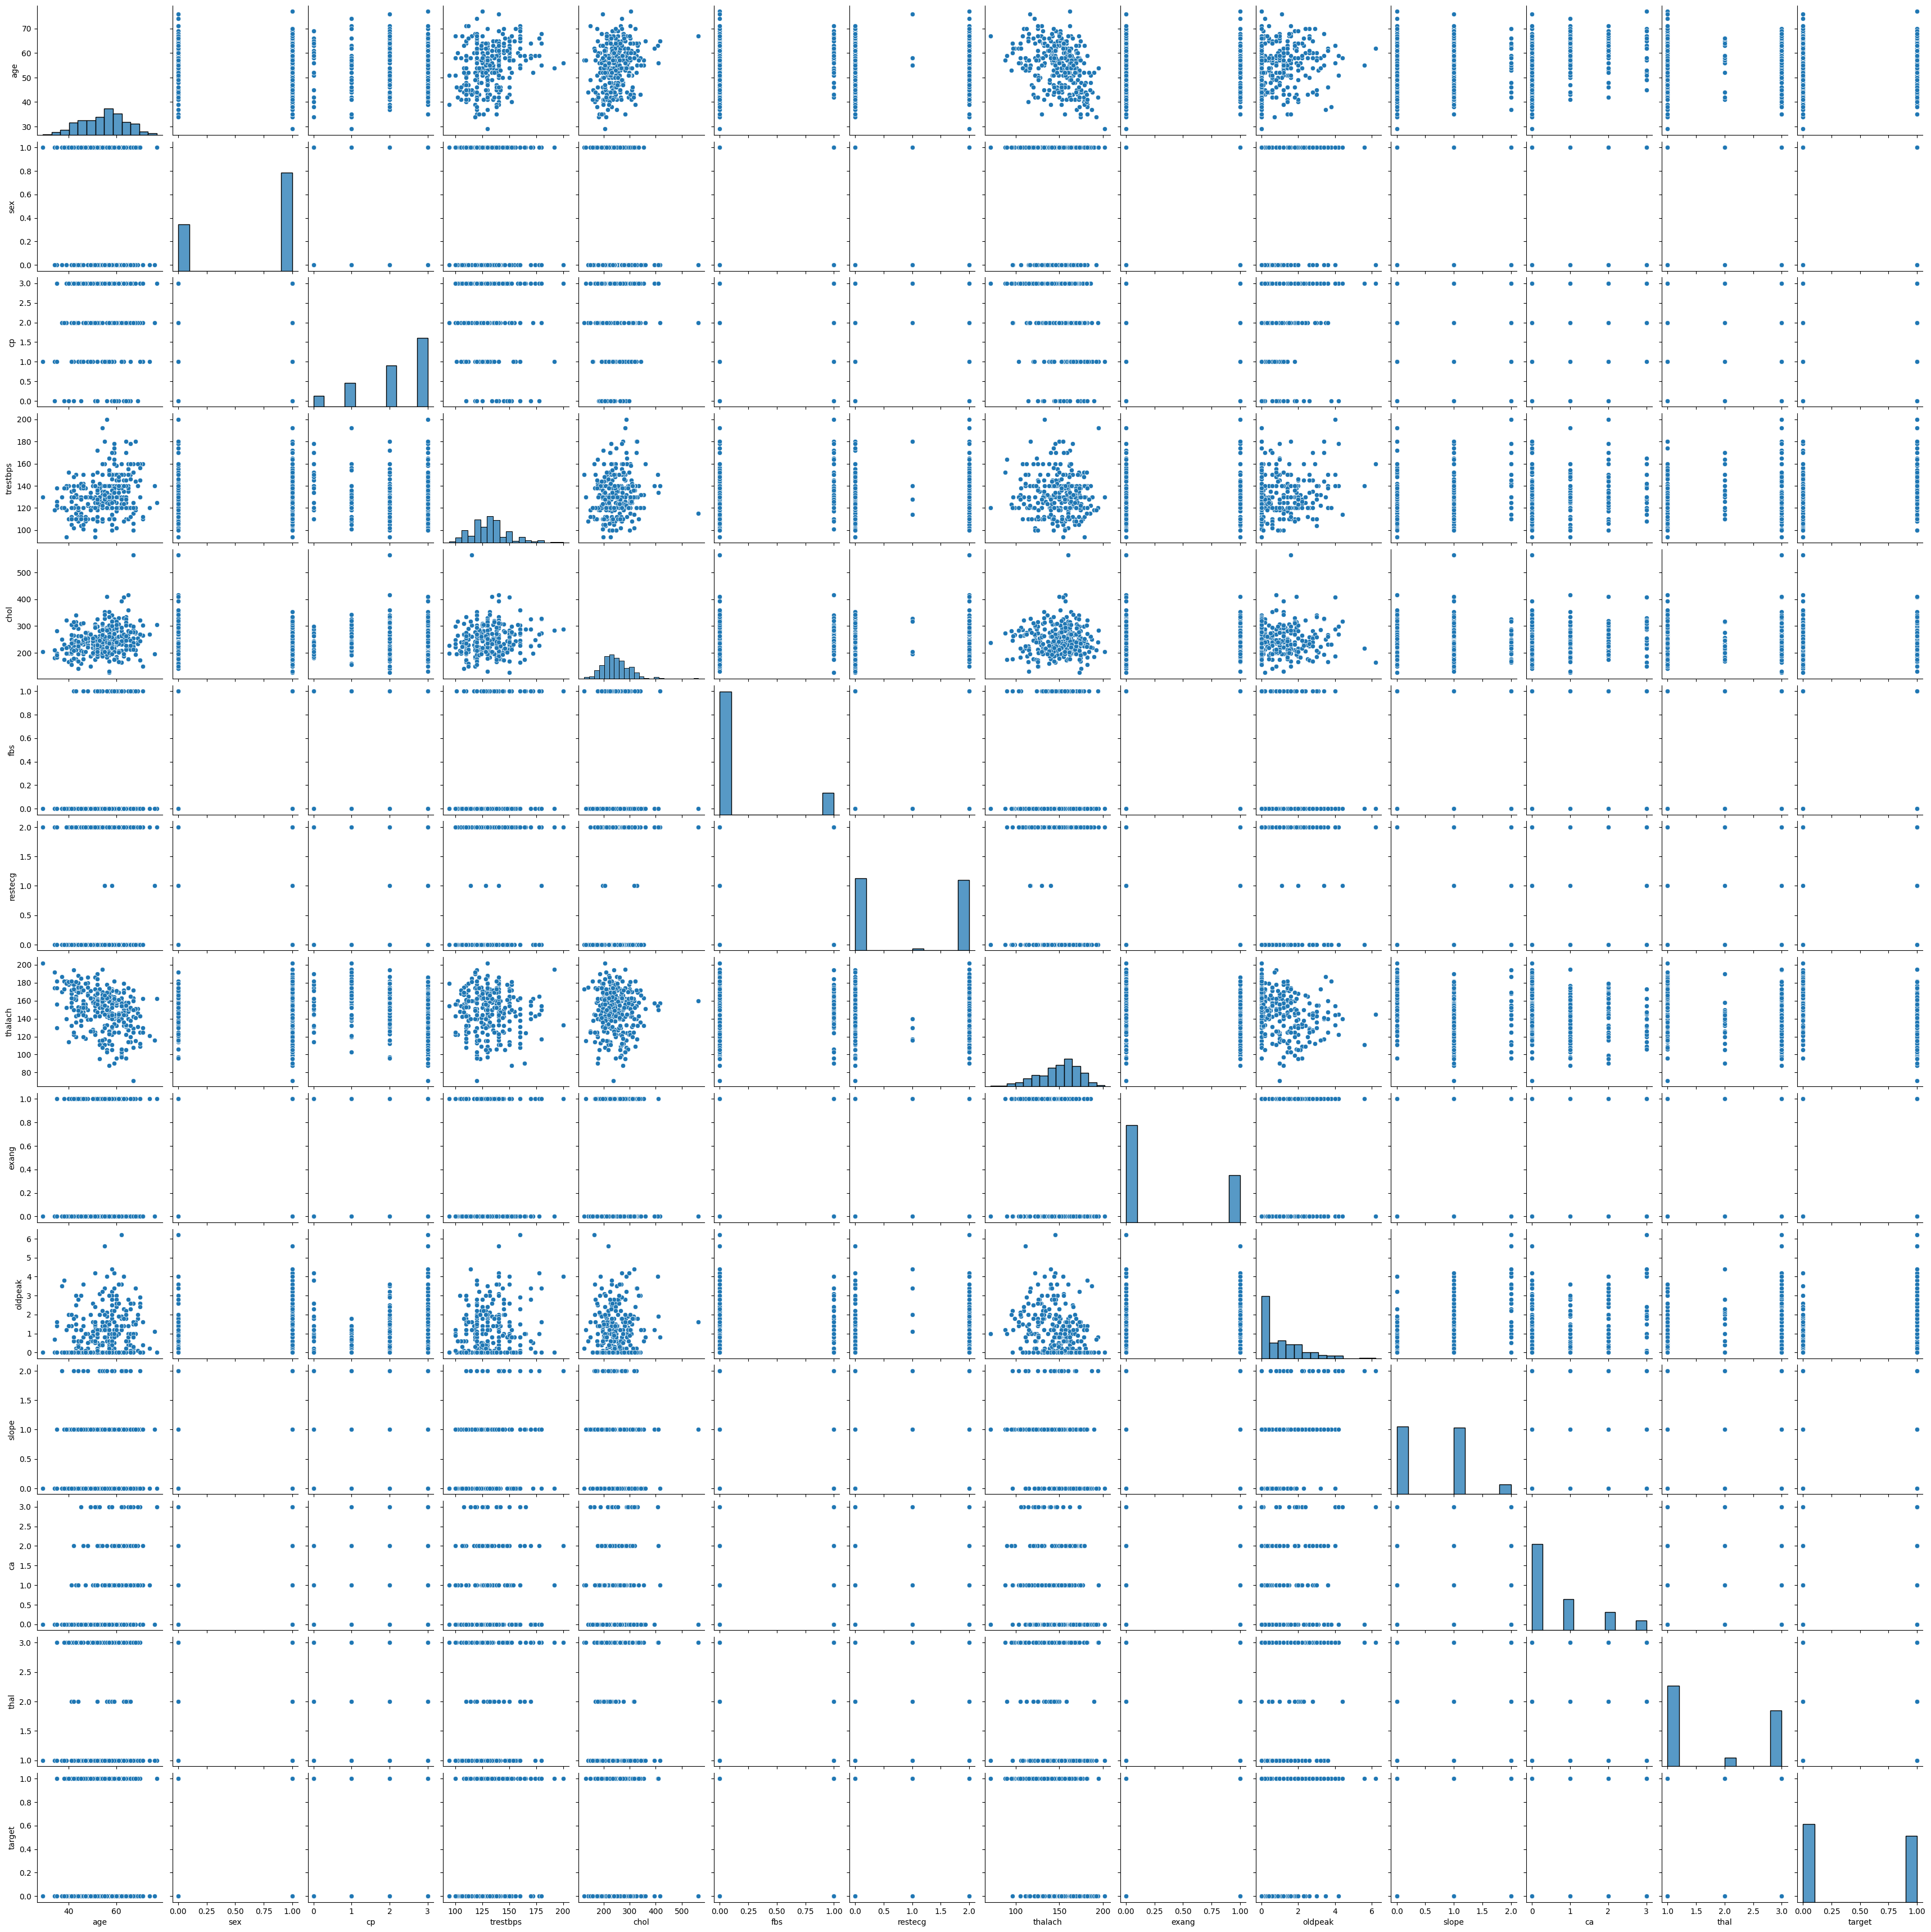

In [ ]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(dataset)

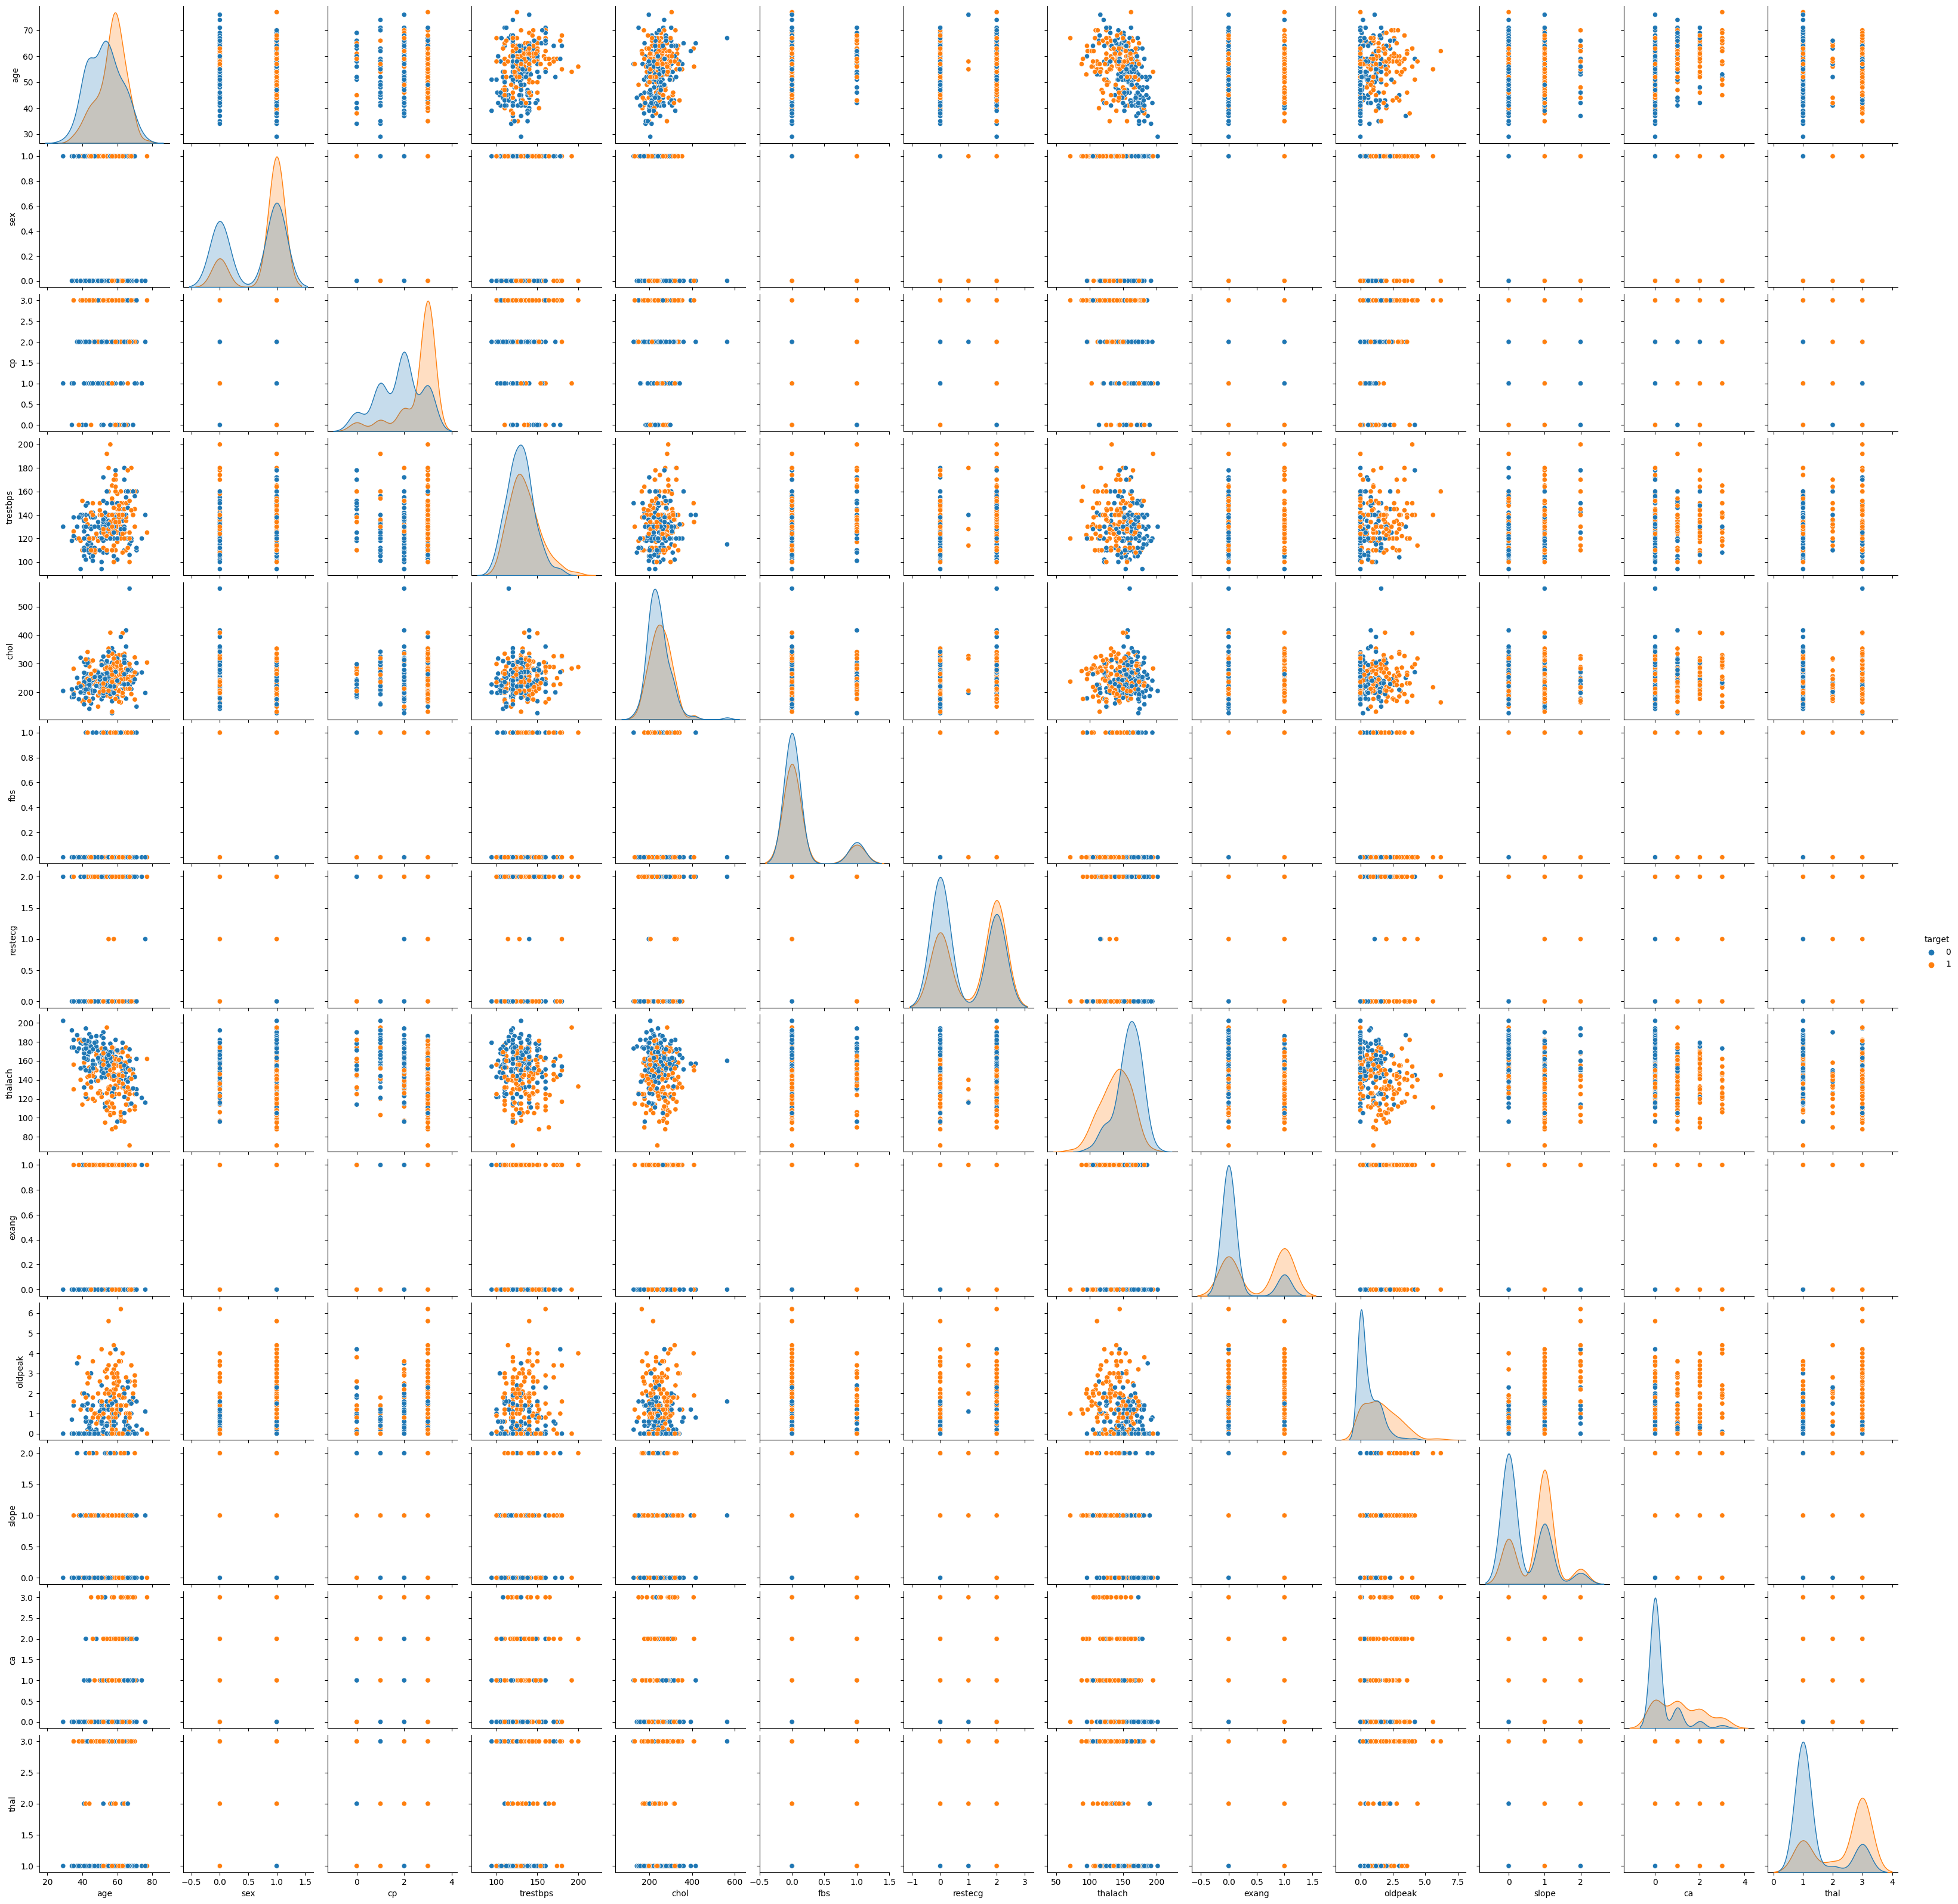

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(dataset, hue = "target", height = 2.5);

A utilização da variação 2 do recurso scatter plot apresentando a divisão pela classe ( variável *target*) nos oferece um overview dos casos de presença ou ausência de doença cardíaca nas variáveis do dataset.

## 4. Pré-Processamento de dados

Executaremos, nesta etapa, algumas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes) e transformações como a normalização ou padronização, já que o presente dataset possui apenas variáveis numéricas.

### Tratamento de missings

Na execução do código *dataset.info()* já vimos que não temos valores *missing*... executaremos o comando a seguir apenas para fins de documentação do passo-a-passo desta etapa.

In [ ]:
# Avaliar nulls no dataset
dataset.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Na execução do comando *dataset.describe()* vimos que temos valores nulos na variável *oldpeak* (Exercício Induzido ST - depressão em relação ao estado de repouso), entretanto não temos conhecimento para avaliar se trata-se de um valor válido ou não (daí a importância do trabalho em conjunto com a área de negócio para avaliação de casos como este). Como tivemos um baixo desvio padrão, então consideraremos que trata-se de um valor válido e finalizaremos aqui esta etapa.   

### Avaliação de Outliers

Na fase de análise de dados foi identificado um resultado de colesterol serico acima dos 500 mg/dl que vamos avaliar com maior atenção.

<Axes: >

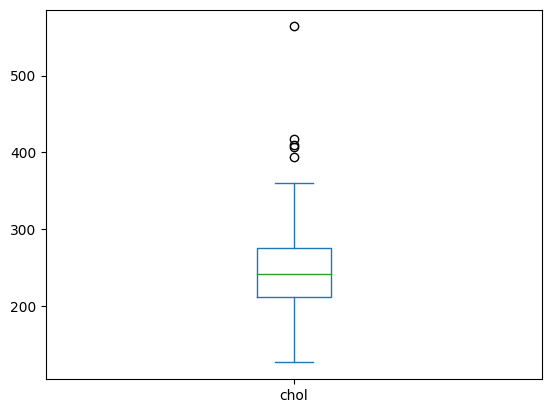

In [ ]:
dataset['chol'].plot(kind='box')

Vamos filtrar esta linha em específico para analisarmos os demais atributos

In [ ]:
dataset[dataset.chol == dataset.chol.max()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
152,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0


Podemos verificar que trata-se de um paciente do sexo feminino com 67 anos, que apresentou o resultado da pressão sanguínea (*trestbps*) abaixo da média e o resultado 2 no  eletrocardiograma (*restecg*), o que indica provável hipertrofia ventricular esquerda. Este resultado de colesterol pode fazer sentido, mas apenas a área de negócio poderia definir isso.

Neste momento, vamos optar por manter este resultado e revisitar esta etapa mais à frente, se necessário.

### Seleção dos atributos - Feature Selection

Preparando a função para a avaliação e a seleção dos atributos mais adequados para uso no modelo.

Como premissa, usaremos a combinação de dois métodos: a Eliminação Recursiva de Atributos e o SelectKBest

In [ ]:
array = dataset.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

In [ ]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=10)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:13])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:13]))

Atributos Originais: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Atributos Selecionados: [False  True  True False False  True  True  True  True  True  True  True
  True]

Ranking de atributos: [2 1 1 3 4 1 1 1 1 1 1 1 1]

Qtd de melhores Atributos: 10

Nomes dos Atributos Selecionados: ['sex' 'cp' 'fbs' 'restecg' 'thalach' 'exang' 'oldpeak' 'slope' 'ca'
 'thal']


In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=10)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:13])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:13]))


Número original de atributos: 13

Número reduzido de atributos: 10

Atributos Originais: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Scores dos Atributos Originais: [ 15.77   24.979  62.424   7.007   2.199   0.192   8.871  63.419  69.021
  66.167  39.138  80.801 109.164]

Atributos Selecionados: ['age' 'sex' 'cp' 'restecg' 'thalach' 'exang' 'oldpeak' 'slope' 'ca'
 'thal']


Criando novo dataset a partir do resultado das duas técnicas de feature selection, temos o seguinte resultado:

In [ ]:
# Seleção dos atributos indicados nas técnicas de Feature Selection

new_data = dataset.loc[:,['sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
 'thal', 'target']]
new_data.head()

,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,0,2,150,0,2.3,2,0,2,0
1,1,3,2,108,1,1.5,1,3,1,1
2,1,3,2,129,1,2.6,1,2,3,1
3,1,2,0,187,0,3.5,2,0,1,0
4,0,1,2,172,0,1.4,0,0,1,0


### Separação dos dados de treino e teste

Nesta fase iremos estabelecer os dados de treino e de teste. Os dados de treino serão usados no treino do futuro modelo preditivo e os de testes serão usados para aferir a eficácia do modelo escolhido.

In [ ]:
# Preparação dos dados

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em bases de treino e teste (holdout)
array = new_data.values
X = array[:,0:9] # atributos
y = array[:,9] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}\nX_test: {X_test.shape}, y_test: {y_test.shape}')

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

X_train: (242, 9), y_train: (242,)
X_test: (61, 9), y_test: (61,)


## 5. Modelagem e Inferência

Para avaliação do problema de classificação, a performance dos modelos abaixo será avaliada:


*   *LogisticRegression*
*   *KNeighborsClassifier*
*   *DecisionTreeClassifier*
*   *GaussianNB*
*   *SVC*







LR: 0.859333 (0.072718)
KNN: 0.764333 (0.053220)
CART: 0.776000 (0.071466)
NB: 0.867500 (0.058714)
SVM: 0.668667 (0.085244)
Bagging: 0.793000 (0.043062)
RF: 0.830667 (0.049845)
ET: 0.809667 (0.038793)
Ada: 0.809667 (0.056208)
GB: 0.784667 (0.070035)
Voting: 0.830167 (0.063594)


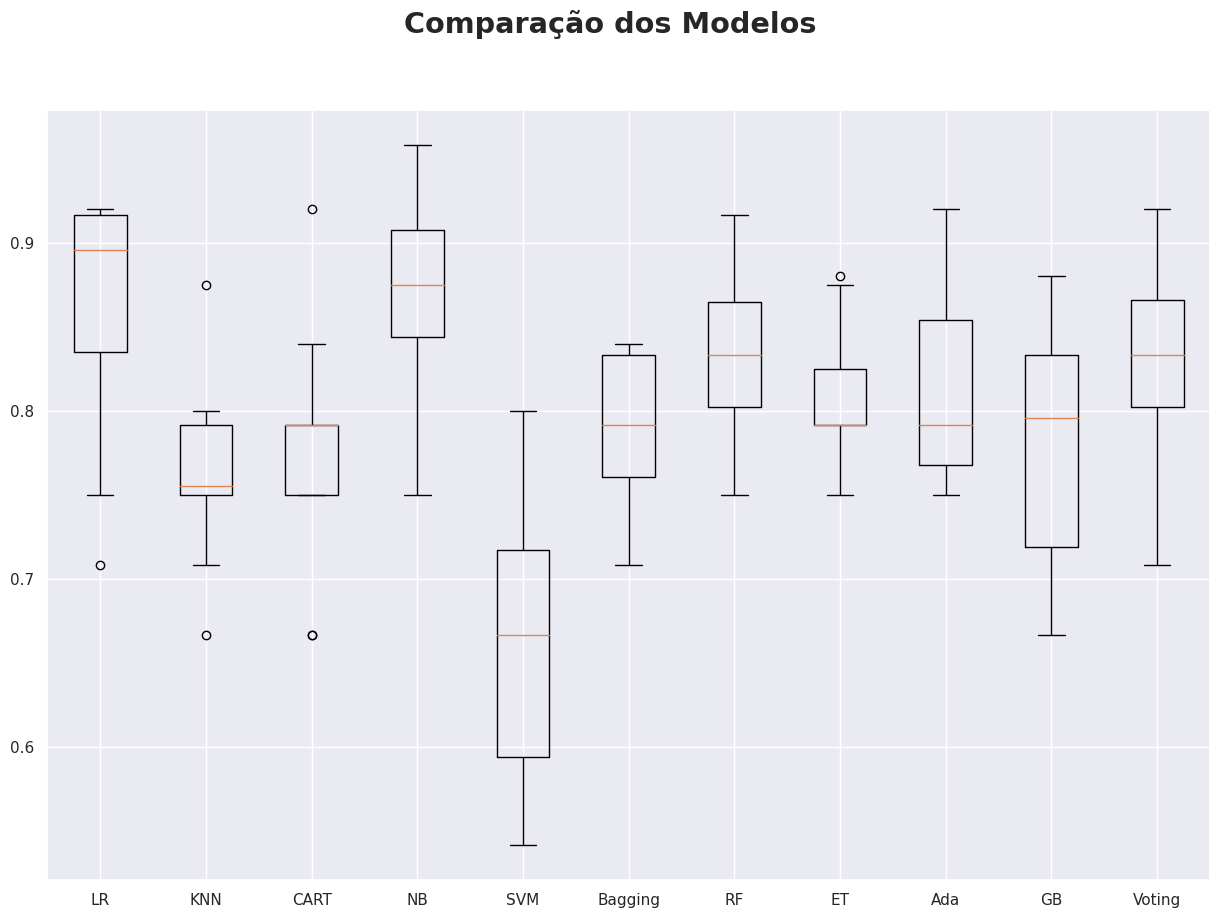

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Como resultado, observou-se que Naive Baynes apresentou melhor acurácia média - 87% - seguido pelo modelo *Logistic Regression* - 86%.

Agora iremos montar um pipeline de testes dos modelos, utilizamos os dados de treino em 3 formas: raw (sem transformação), padronizados e normalizados. O objetivo é elencar qual(ais) os modelos tem maior acurácia.

LR-orig: 0.859 (0.073)
KNN-orig: 0.764 (0.053)
CART-orig: 0.776 (0.071)
NB-orig: 0.868 (0.059)
SVM-orig: 0.669 (0.085)
Bag-orig: 0.793 (0.043)
RF-orig: 0.831 (0.050)
ET-orig: 0.810 (0.039)
Ada-orig: 0.810 (0.056)
GB-orig: 0.785 (0.070)
Vot-orig: 0.830 (0.064)
LR-padr: 0.859 (0.073)
KNN-padr: 0.839 (0.060)
CART-padr: 0.756 (0.064)
NB-padr: 0.868 (0.059)
SVM-padr: 0.847 (0.079)
Bag-padr: 0.797 (0.049)
RF-padr: 0.827 (0.048)
ET-padr: 0.797 (0.047)
Ada-padr: 0.810 (0.056)
GB-padr: 0.781 (0.070)
Vot-padr: 0.859 (0.081)
LR-norm: 0.859 (0.075)
KNN-norm: 0.818 (0.067)
CART-norm: 0.764 (0.076)
NB-norm: 0.868 (0.059)
SVM-norm: 0.834 (0.059)
Bag-norm: 0.801 (0.042)
RF-norm: 0.839 (0.035)
ET-norm: 0.797 (0.052)
Ada-norm: 0.810 (0.056)
GB-norm: 0.785 (0.070)
Vot-norm: 0.859 (0.060)


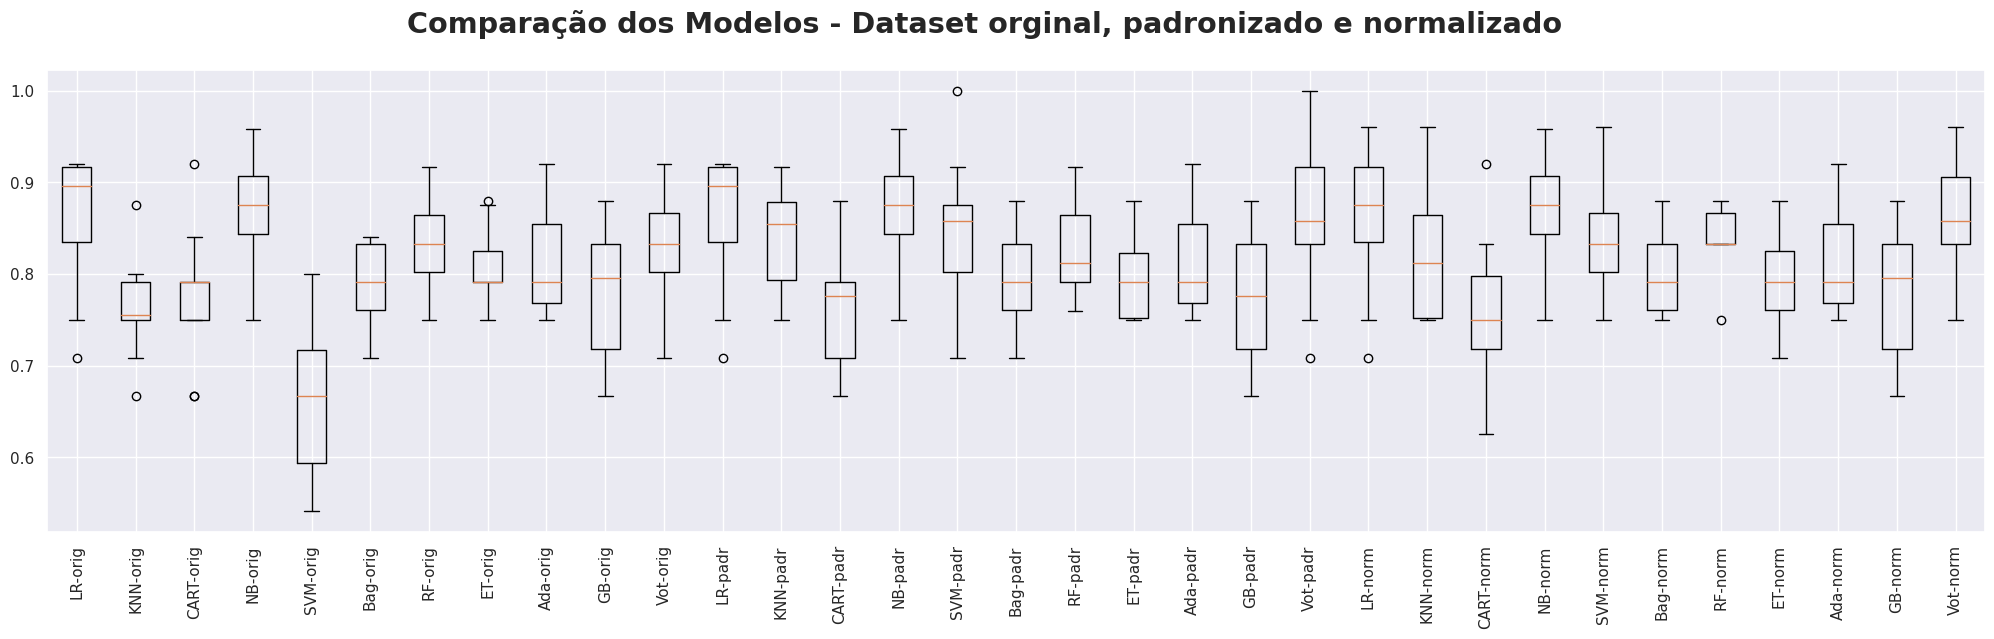

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Observou-se que a performance do Naive Baynes e *Logistic Regression* seguiram com a maior acurácia média, 87% e 86% respectivamente. Utilizaremos, portanto, estes dois modelos nos steps seguintes para verificar qual no final terá melhor performance.

### Otimização dos hiperparâmetros

Nesta fase iremos utilizar os resultados obtidos nos pipelines de avaliação de modelo, procurando otimiza-lo ainda mais por meio de alterações dos hiperparâmetros.

In [ ]:
#Tuning do modelo Nayve Baynes - escolhido por ter apresentado melhor resultado nos steps anteriores

gnb=GaussianNB()
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)} # parametros do Nayve em dicionarios

gs_NB = GridSearchCV(estimator=gnb, param_grid=params_NB, cv=cv_method, verbose=0, scoring=scoring) #Formatando o Grid Search
gs_NB.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",gs_NB.best_params_)
print("accuracy :",gs_NB.best_score_)


tuned hpyerparameters :(best parameters)  {'var_smoothing': 0.0003511191734215131}
accuracy : 0.8638321995464852


In [ ]:
#Tunning logistic Regression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.859


Pode-se observar uma diminuição de 1% na acurácia do modelo Naive Baynes e o resultado do *Logistic Regression* manteve-se o mesmo. Como premissa, permaneceremos com os parâmetros de entrada do step de modelagem.

### Avaliação do modelo

Para visualização de como o modelo de classificação está performando, vamos incluir a matriz de confusão (confusion matrix). A matriz nos mostra o número de casos em que o nosso modelo acertou ou errou em cada categoria.

Relatório de classificação:
               precision    recall  f1-score   support

         0.0     0.8652    0.9037    0.8841       135
         1.0     0.8713    0.8224    0.8462       107

    accuracy                         0.8678       242
   macro avg     0.8683    0.8631    0.8651       242
weighted avg     0.8679    0.8678    0.8673       242



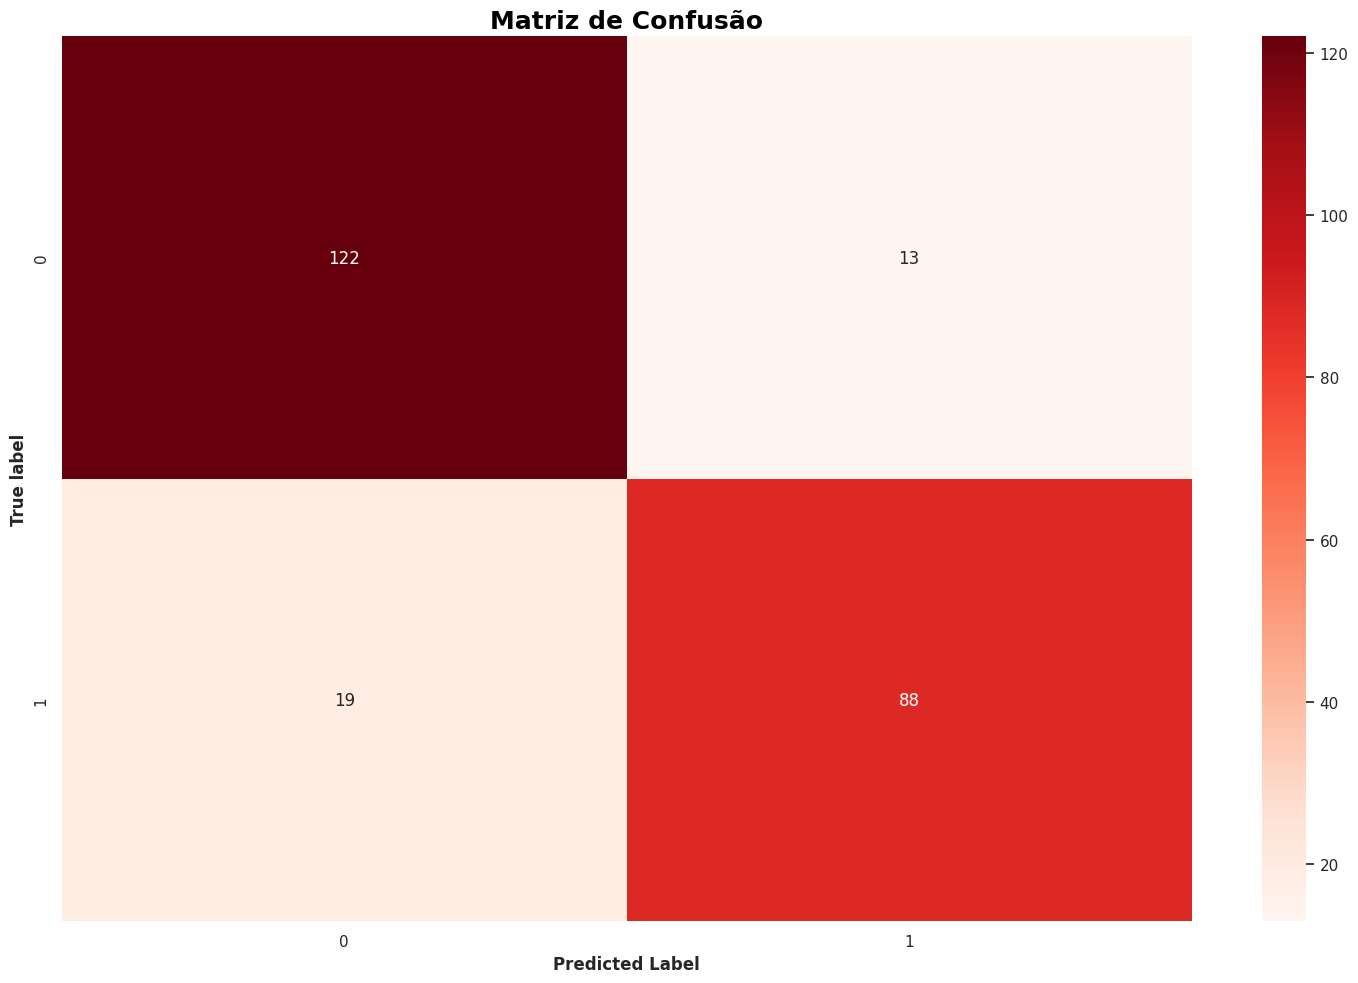

In [ ]:
# Avaliando o Naive Baynes

model = GaussianNB()
y_pred = cross_val_predict(model, X_train, y_train, cv = kfold)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True,
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))


Relatório de classificação:
               precision    recall  f1-score   support

         0.0     0.8613    0.8741    0.8676       135
         1.0     0.8381    0.8224    0.8302       107

    accuracy                         0.8512       242
   macro avg     0.8497    0.8483    0.8489       242
weighted avg     0.8510    0.8512    0.8511       242



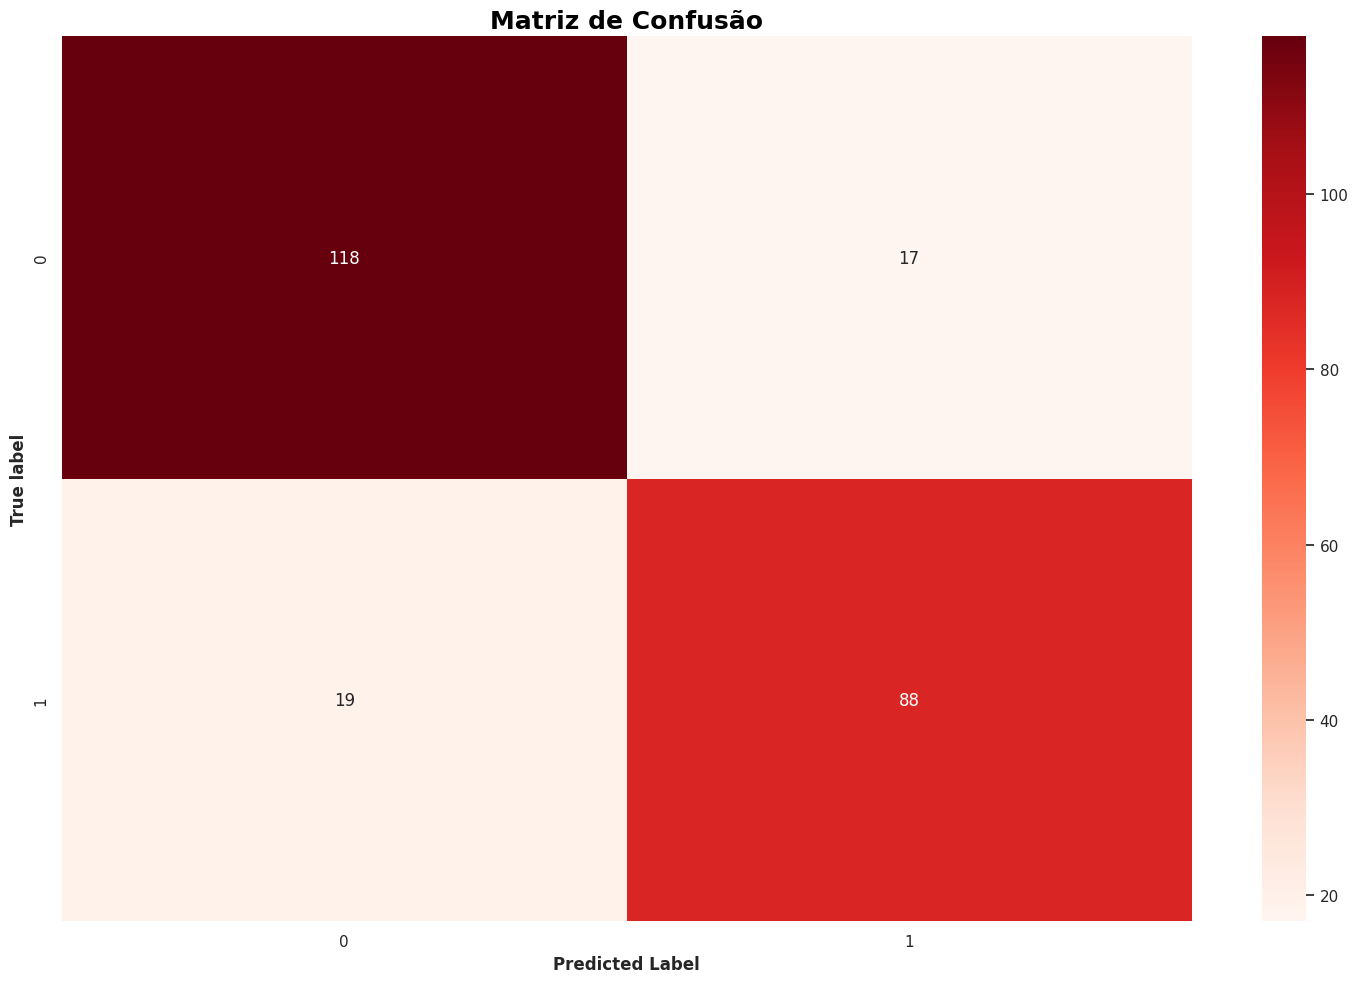

In [ ]:
# Avaliando o Regression Logistic

model = LogisticRegression()
y_pred = cross_val_predict(model, X_train, y_train, cv = kfold)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True,
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

A análise da matriz de confusão dos modelos Naives Baynes e *Logistic Regression* indica uma performance muita próxima referente a número de acertos e erros de ambos os modelos, com pequena vantagem para o Naive Baynes. Um detalhe interessante foi o mesmo número de acertos da classe 1.

## 6. Finalização do Modelo

FInalizando o modelo, iremos utilizar os resultados e respectivos hiperparâmetros, aplica-los na massa de teste e rodar a predição.

In [ ]:
# Avaliação do modelo Naive Baynes com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino

# utilizando hiperparametros definidos no treino
model1=GaussianNB()
model1.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model1.predict(rescaledTestX)

print(accuracy_score(y_test, predictions)*100)

81.9672131147541


In [ ]:
# Avaliação do modelo Logistic Regression com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino

# utilizando hiperparametros definidos no treino
model2=LogisticRegression()
model2.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model2.predict(rescaledTestX)

print(accuracy_score(y_test, predictions)*100)

81.9672131147541


A avaliação de ambos os modelos indicou a mesma performance de 82% no conjunto de teste. Vamos imprimir o relatório de classificação e verificar os detalhes.

In [ ]:
# Avaliando o Naive Baynes

final_model1 = GaussianNB()
final_model1.fit(X_train, y_train)
y_pred = final_model1.predict(X_test)
y_prob = final_model1.predict_proba(X_test)

# imprimir relatório de classificação
print("Relatório de Classificação: \n",
      classification_report(y_test, y_pred, digits=4))

Relatório de Classificação: 
               precision    recall  f1-score   support

         0.0     0.7647    0.8966    0.8254        29
         1.0     0.8889    0.7500    0.8136        32

    accuracy                         0.8197        61
   macro avg     0.8268    0.8233    0.8195        61
weighted avg     0.8299    0.8197    0.8192        61



In [ ]:
# Avaliando o Logistic Regression

final_model2 = LogisticRegression()
final_model2.fit(X_train, y_train)
y_pred = final_model2.predict(X_test)
y_prob = final_model2.predict_proba(X_test)

# imprimir relatório de classificação
print("Relatório de Classificação: \n",
      classification_report(y_test, y_pred, digits=4))

Relatório de Classificação: 
               precision    recall  f1-score   support

         0.0     0.7500    0.9310    0.8308        29
         1.0     0.9200    0.7188    0.8070        32

    accuracy                         0.8197        61
   macro avg     0.8350    0.8249    0.8189        61
weighted avg     0.8392    0.8197    0.8183        61



O relatório de classificação apontou que os modelos apresentaram um resultado muito próximo. Uma acurácia de 82% é um bom resultado e, como próximos passos, sugere-se a aplicação dos modelos em novos dados com uma amostragem maior.

## 7. Considerações finais

Este trabalhou buscou a criação de um modelo de classificação para predição de doenças cardíacas com base em algumas variáveis. Durante o exercício, verificou-se que os modelos Naive Baynes e *Logistic Regression* apresentaram a melhor performance, com uma acurácia média de 87% e 86% respectivamente. A tentativa de otimização dos hiperparâmetros para o Naive Baynes piorou o resultado enquanto que no *Logistic Regression* o resultado se manteve. Por fim, a aplicação dos modelos na base de teste resultou numa mesma acurácia de 82%, o que é um bom resultado.

Como próximos passos, fica a tentativa de ajustes dos hiperparâmetros a fim de buscar melhorar o resultado de ambos os modelos e a aplicação do exercício numa base de dados maior.

# Deep Learning para problema de visão computacional

## 1. Definição do Problema

O dataset objeto deste estudo foi obtido através do site https://www.cs.toronto.edu/~kriz/cifar.html . Trata-se do conjunto de dados CIFAR-10 que consiste em 60.000 imagens coloridas 32x32 em 10 classes, com 6.000 imagens por classe.

CIFAR é um acrônimo que significa Canadian Institute For Advanced Research (Instituto Canadense de Pesquisa Avançada) e o conjunto de dados CIFAR-10 foi desenvolvido junto com o conjunto de dados CIFAR-100 por pesquisadores do instituto CIFAR.

Os rótulos da classe e seus valores inteiros associados padrão estão listados abaixo.

*   airplane (avião)
*   automobile (automóvel)
*   bird (pássaro)
*   cat (gato)
*   deer (veado)
*   dog (cachorro)
*   frog (sapo)
*   horse (cavalo)
*   ship (navio)
*   truck (caminhão)

O conjunto de dados é dividido em cinco lotes de treinamento e um lote de teste, cada um com 10.000 imagens. O lote de teste contém exatamente 1.000 imagens selecionadas aleatoriamente de cada classe. Os lotes de treinamento contêm as imagens restantes em ordem aleatória, mas alguns lotes de treinamento podem conter mais imagens de uma classe do que de outra. Entre eles, os lotes de treinamento contêm exatamente 5.000 imagens de cada classe.

O objetivo, portanto, deste trabalho é a criação de um modelo com uma boa acurácia na classificação das imagens.

In [4]:
try: #If running in colab
    import google.colab
    IN_COLAB = True
    %tensorflow_version 2.x
except:
    IN_COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.12.0  running in colab?:  True


In [ ]:
if IN_COLAB:
    !pip install tensorflow_probability==0.8.0

In [6]:
# import das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation, Dropout
from tensorflow.keras.utils import to_categorical

## Carga, exibição e normalização dos dados

<ipython-input-11-070fdf4f0ea4>:12: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title(labels[i]+" "+np.str(y_train[rmd][0]))


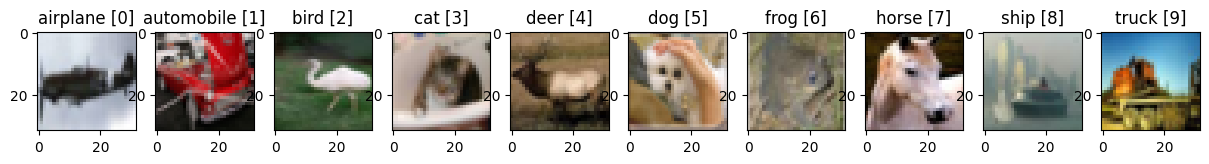

In [11]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])
#sample image of each label
plt.figure(figsize=(15,15))
for i in range(0,len(np.unique(y_train))):
    rmd=np.random.choice(np.where(y_train==i)[0],1)
    plt.subplot(1,10,i+1)
    img=x_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i]+" "+np.str(y_train[rmd][0]))


X_train=((x_train / 255)-0.5)*2 # normaliza o dataset num range de -1 a 1
Y_train=tensorflow.keras.utils.to_categorical(y_train,10) # one-hot encoding

X_test=((x_test / 255)-0.5)*2   # normaliza o dataset num range de -1 a 1
Y_test=tensorflow.keras.utils.to_categorical(y_test,10) # one-hot encoding


Verificando o tamanho do dataset de treino e teste

In [8]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [12]:
# definição dos hiperparâmetros da CNN
batch_size = 128
img_rows, img_cols = 32, 32
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)
pool_size = (2, 2)

## Modelagem

Serão executados dois steps da CNN. O primeiro sem a adição de um step de *dropout layer* e o segundo com a adição de um step com *dropout layer* para avaliação de qual modelo performará melhor.

CNN sem dropout layer

In [13]:
nb_classes = 10

# define CNN com 2 blocos de convolução e 2 layers conectados
model = Sequential()

model.add(Convolution2D(16,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(32,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(32,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))


model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compila o modelo and inicializa pesos
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                        

In [15]:
history1=model.fit(X_train, Y_train,validation_data=(X_test,Y_test), batch_size=128,epochs=30,verbose=1)

Epoch 1/30
391/391 [==============================] - 148s 374ms/step - loss: 1.4947 - accuracy: 0.4592 - val_loss: 1.2364 - val_accuracy: 0.5525
Epoch 2/30
391/391 [==============================] - 138s 353ms/step - loss: 1.1123 - accuracy: 0.6039 - val_loss: 1.0349 - val_accuracy: 0.6344
Epoch 3/30
391/391 [==============================] - 141s 361ms/step - loss: 0.9313 - accuracy: 0.6711 - val_loss: 0.9626 - val_accuracy: 0.6608
Epoch 4/30
391/391 [==============================] - 139s 356ms/step - loss: 0.8128 - accuracy: 0.7144 - val_loss: 0.8895 - val_accuracy: 0.6847
Epoch 5/30
391/391 [==============================] - 138s 353ms/step - loss: 0.7230 - accuracy: 0.7445 - val_loss: 0.8512 - val_accuracy: 0.7075
Epoch 6/30
391/391 [==============================] - 140s 359ms/step - loss: 0.6471 - accuracy: 0.7736 - val_loss: 0.8802 - val_accuracy: 0.7012
Epoch 7/30
391/391 [==============================] - 138s 354ms/step - loss: 0.5846 - accuracy: 0.7940 - val_loss: 0.8494 -

CNN com dropout layer

Neste step treinaremos uma CNN para classificação das imagens em 10 classes. Vamos adicionar uma etapa de *dropout layer* , usando um rate de 0.5. Isso significa que metade dos nodes são deletados de acordo com a atualização dos steps. Objetiva-se com isso minimizar a incidência de *overfitting*.

In [16]:
nb_classes = 10

# define CNN com 2 blocos de convolução e 2 layers conectados
model = Sequential()

model.add(Convolution2D(16,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(32,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(32,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))


model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compila o modelo e inicializa os pesos
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 activation_7 (Activation)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 activation_8 (Activation)   (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                      

In [19]:
history2=model.fit(X_train, Y_train,validation_data=(X_test,Y_test), batch_size=128,epochs=30,verbose=1)

Epoch 1/30
391/391 [==============================] - 149s 382ms/step - loss: 0.6791 - accuracy: 0.7652 - val_loss: 0.7829 - val_accuracy: 0.7439
Epoch 2/30
391/391 [==============================] - 146s 375ms/step - loss: 0.6610 - accuracy: 0.7707 - val_loss: 0.7860 - val_accuracy: 0.7421
Epoch 3/30
391/391 [==============================] - 147s 374ms/step - loss: 0.6411 - accuracy: 0.7808 - val_loss: 0.7909 - val_accuracy: 0.7444
Epoch 4/30
391/391 [==============================] - 145s 372ms/step - loss: 0.6339 - accuracy: 0.7809 - val_loss: 0.8098 - val_accuracy: 0.7431
Epoch 5/30
391/391 [==============================] - 150s 383ms/step - loss: 0.6234 - accuracy: 0.7806 - val_loss: 0.7963 - val_accuracy: 0.7431
Epoch 6/30
391/391 [==============================] - 143s 365ms/step - loss: 0.6132 - accuracy: 0.7877 - val_loss: 0.8395 - val_accuracy: 0.7336
Epoch 7/30
391/391 [==============================] - 149s 381ms/step - loss: 0.6061 - accuracy: 0.7884 - val_loss: 0.8135 -

## Avaliação dos modelos

Neste exercício avaliaremos a performance de ambos os modelos

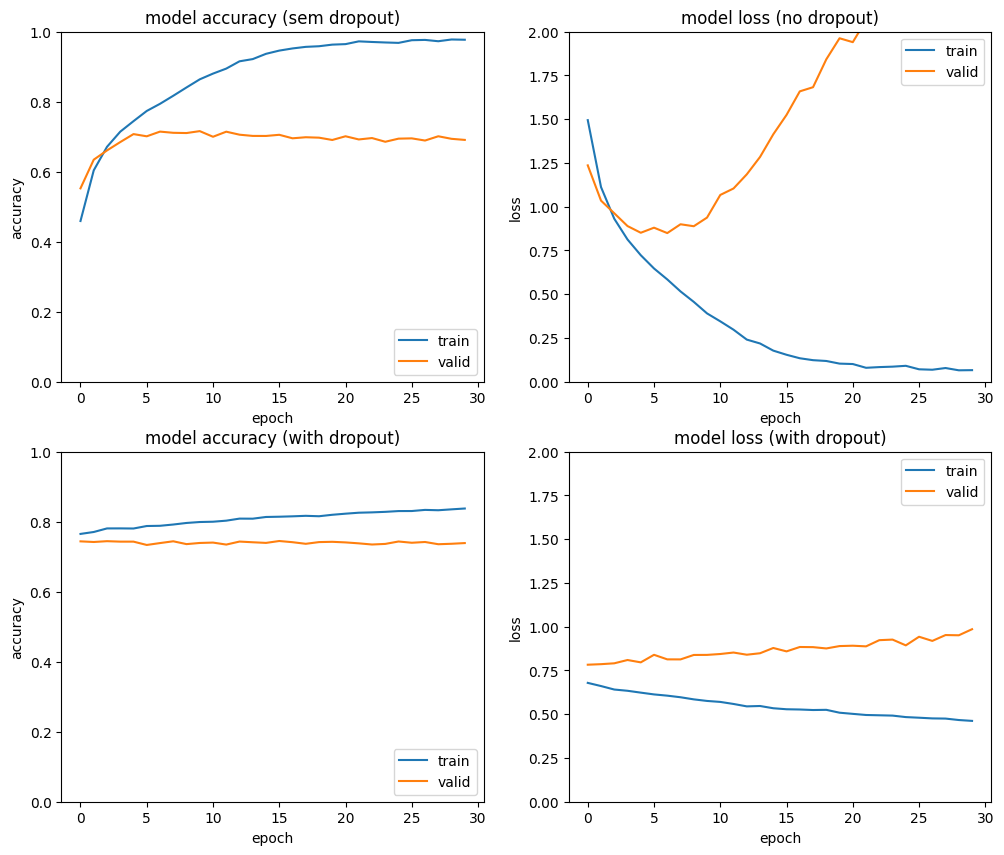

In [21]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy (sem dropout)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss (no dropout)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])


plt.subplot(2,2,3)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy (with dropout)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,4)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss (with dropout)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])
plt.show()

Podemos verificar claramente que o modelo sem dropout teve overfitting e que o modelo com dropout possui curvas mais lineares, evidenciando uma melhor performance.

## Considerações finais

Este trabalhou buscou a criação de um modelo para classificação de imagens. Criamos dois modelos, o primeiro sem inclusão de *dropout layer* e o segundo com a inclusão. Observou-se que a performance do modelo com a inclusão do *dropout* foi muito superior nas métricas acurácia e perda. Também verificou-se que na performance do modelo sem o *dropout* houve overfitting.


Como próximos passos, fica a tentativa de ajustes dos hiperparâmetros e das épocas, a fim de buscar melhorar o resultado do modelo. Um fato que foi observado neste exercício é que não é possível *setar* uma época muito grande para execução do modelo no colab. Então uma oportunidade de melhoria seria treinar o modelo num computador pessoal.